**SEABORN**

**Exercices**

**Exercice 1 -  Visualisation des notes des étudiants :**
* a) Chargez le fichier "student_grades.csv" dans un DataFrame nommé "grades_df".
* b) Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.


In [23]:
import pandas as pd

path_csv = "student_grades.csv"
grades_df = pd.read_csv(path_csv, header=None, names=['ID', 'salle', 'note'])

# Création d'un dictionnaire pour faire correspondre les notes alphabetiques avec les notes numeriques
grade_to_num = {
    'E-': 0, 'E': 1, 'E+': 2,
    'D-': 3, 'D': 4, 'D+': 5,
    'C-': 6, 'C': 7, 'C+': 8,
    'B-': 9, 'B': 10, 'B+': 11,
    'A-': 12, 'A': 13, 'A+': 14,
}

# On place donc les valeurs decimales associées aux notes alphabetiques grace au map dans une nouvelle colonne note_dec
grades_df['note_dec'] = grades_df['note'].map(grade_to_num)

# On transforme en note sur 20
# Avec fonction .apply
grades_df['note_dec'] = grades_df['note_dec'].apply(lambda x: (x / 14) * 20)

# Version sans fonction, mais avec operation vectorisée
#grades_df['note_dec'] = (grades_df['note_dec']/14)*20

# Ajout d'une colonne 'result' contenant 'Réussite' si note >=10 sinon 'Echec'   
grades_df['result'] = grades_df['note_dec'].apply(lambda x: "Réussite" if x >= 10 else "Échec")

print(grades_df)

           ID  salle note   note_dec    result
0   401767594      4    C  10.000000  Réussite
1   401767594      3   B-  12.857143  Réussite
2   678665086      4   A+  20.000000  Réussite
3   678665086      3   A+  20.000000  Réussite
4   553725811      2    C  10.000000  Réussite
5   678665086      1    B  14.285714  Réussite
6   886308195      1    A  18.571429  Réussite
7   103066521      2    C  10.000000  Réussite
8   103066521      3   C-   8.571429     Échec
9   821568627      4    D   5.714286     Échec
10  821568627      2   A+  20.000000  Réussite
11  821568627      1    B  14.285714  Réussite
12  206208438      2    A  18.571429  Réussite
13  206208438      1   C+  11.428571  Réussite
14  341324754      2   D-   4.285714     Échec
15  341324754      1   A-  17.142857  Réussite
16  103066521      4    A  18.571429  Réussite
17  262019426      2    B  14.285714  Réussite
18  262019426      3    C  10.000000  Réussite
19  622665098      1    A  18.571429  Réussite
20  622665098

In [ ]:
# installation de seaborn depuis un Notebook Jupyter
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 901.1 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


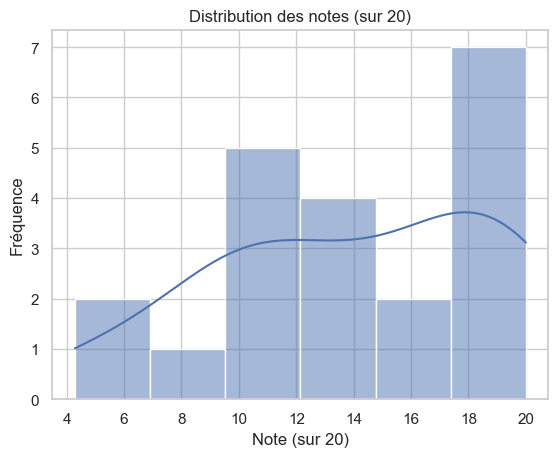

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.histplot(data=grades_df, x="note_dec", kde=True)

plt.title("Distribution des notes (sur 20)")
plt.xlabel("Note (sur 20)")
plt.ylabel("Fréquence")

plt.show()


**Exercice 2 - Comparaison des notes en fonction des salles :**
* a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.


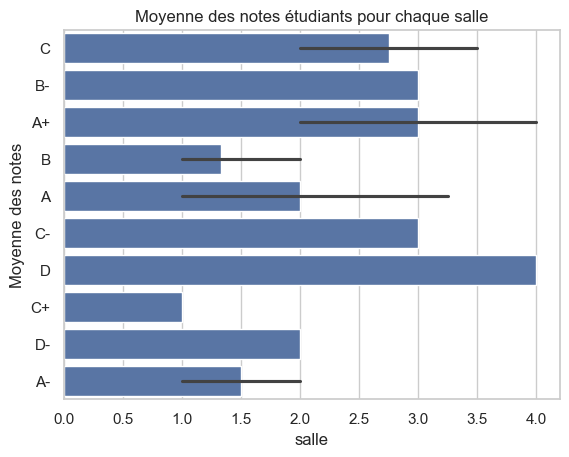

In [14]:
sns.set(style="whitegrid")

# Graphique à barres: Moyenne des notes par salle
sns.barplot(data=grades_df, x="salle", y="note", estimator="mean")

plt.title("Moyenne des notes étudiants pour chaque salle")
plt.xlabel('salle')
plt.ylabel('Moyenne des notes')

plt.show()